# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

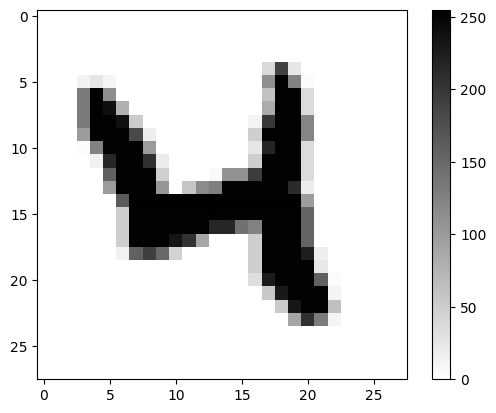

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [7]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,
          0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,
          0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,
          0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,
          0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,
          6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116,
        128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253,
        255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252,
        253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252,
        217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,
          0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,
          0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

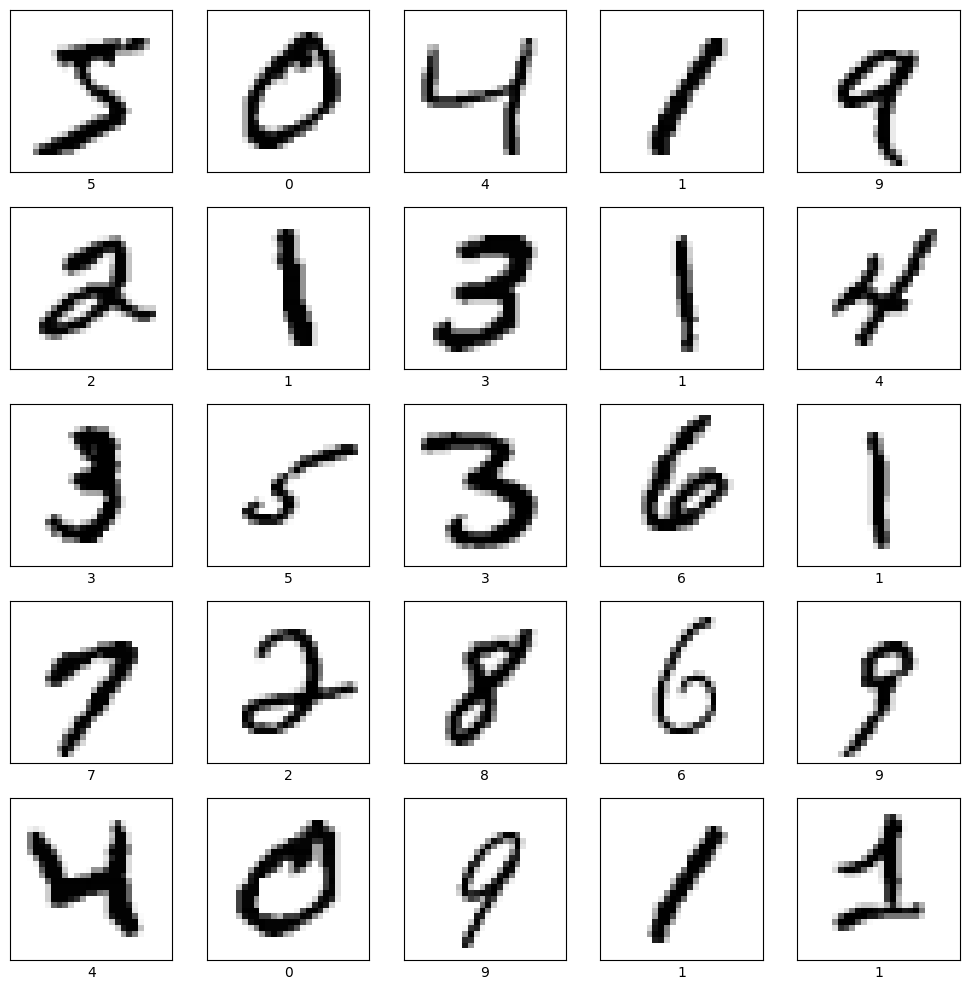

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [9]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [11]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [12]:
x_train = x_train.reshape(60000, -1) # 60000 행에 (28x28)개의 열
x_val = x_val.reshape(10000, -1)

In [13]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [14]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링

In [15]:
nfeatures = x_train.shape[1]
nfeatures

784

In [16]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5150 - val_loss: 0.3191
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3174 - val_loss: 0.2877
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2930 - val_loss: 0.2787
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2811 - val_loss: 0.2731
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2737 - val_loss: 0.2671
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2687 - val_loss: 0.2650
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2637 - val_loss: 0.2668
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2606 - val_loss: 0.2627
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2580 - val_loss: 0.2617
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.255

* 학습결과 그래프

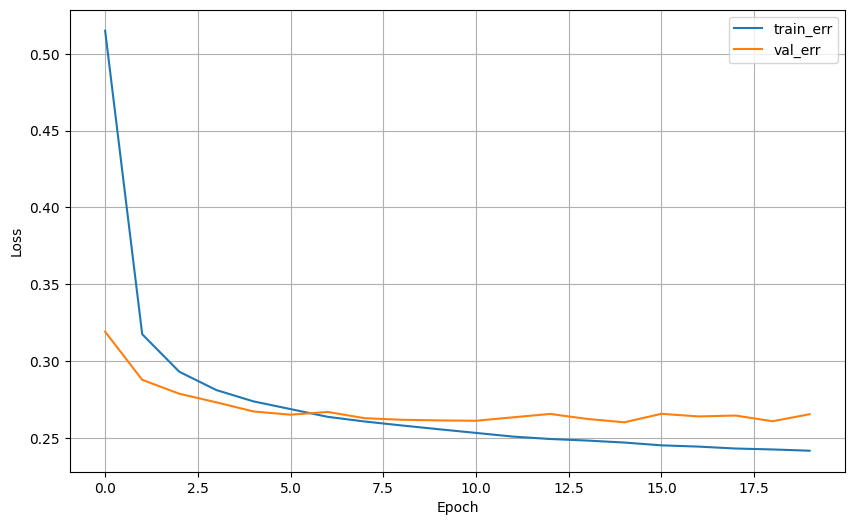

In [18]:
dl_history_plot(history)

* 예측 및 평가

In [19]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 957    0    2    2    1    6    9    2    1    0]
 [   0 1120    4    0    0    1    4    2    4    0]
 [   4    9  955    9    8    3   11    9   20    4]
 [   3    0   29  909    0   27    3   11   16   12]
 [   1    1    7    1  912    0    9    4    5   42]
 [   8    2    4   33    8  782   13    9   25    8]
 [  11    3   10    1    7   11  912    1    2    0]
 [   1    7   25    6    8    1    0  944    2   34]
 [   7   10   10   21    8   25   12    9  854   18]
 [  11    8    1   11   20    4    0   14    3  937]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.91      0.93      0.92      1032
           3       0.92      0.90      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [46]:
clear_session()

model1 = Sequential([Dense(128, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(64, activation='relu'),
                     Dense(16, activation='relu'),
                     Dense(10, activation='softmax')])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 109946 (429.48 KB)
Trainable params: 109946 (429.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss= 'sparse_categorical_crossentropy' )

history = model1.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.8586 - val_loss: 0.3355
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2930 - val_loss: 0.2275
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2166 - val_loss: 0.1875
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1797 - val_loss: 0.1702
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1547 - val_loss: 0.1516
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1358 - val_loss: 0.1406
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1210 - val_loss: 0.1294
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1086 - val_loss: 0.1263
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0980 - val_loss: 0.1238
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.08

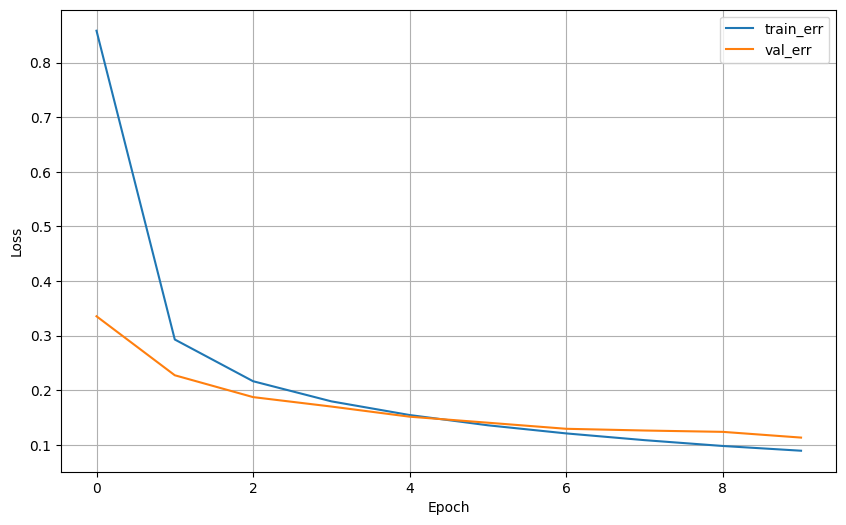

In [51]:
dl_history_plot(history)

In [52]:
pred = model1.predict(x_test)
pred_11 = pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [53]:
print(confusion_matrix(y_val, pred_11))
print(classification_report(y_val, pred_11))

[[ 962    0    1    1    1    4    3    5    3    0]
 [   0 1120    2    2    0    2    3    0    6    0]
 [   4    2 1005    5    2    0    1    7    6    0]
 [   0    0    5  978    0    8    0    7   12    0]
 [   0    0    7    0  960    0    2    3    1    9]
 [   4    1    0   16    1  854    7    0    7    2]
 [   7    3    2    0   10   13  917    0    6    0]
 [   0    7   12    7    1    1    0  987    1   12]
 [   4    0    3   12    5    3    3    5  938    1]
 [   4    5    1    8   20    8    0    8   13  942]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.96   

### (2) 모델2

In [36]:
clear_session()

model2 = Sequential([Dense(15, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(10, activation='relu'),
                    Dense(20, activation='relu'),
                    Dense(10, activation='softmax')])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 12365 (48.30 KB)
Trainable params: 12365 (48.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model2.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5518 - val_loss: 0.2950
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2659 - val_loss: 0.2338
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2214 - val_loss: 0.2112
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1966 - val_loss: 0.1993
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1800 - val_loss: 0.1929
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1674 - val_loss: 0.1883
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1576 - val_loss: 0.2002
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1500 - val_loss: 0.1799
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1424 - val_loss: 0.1821
Epoch 10/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.13

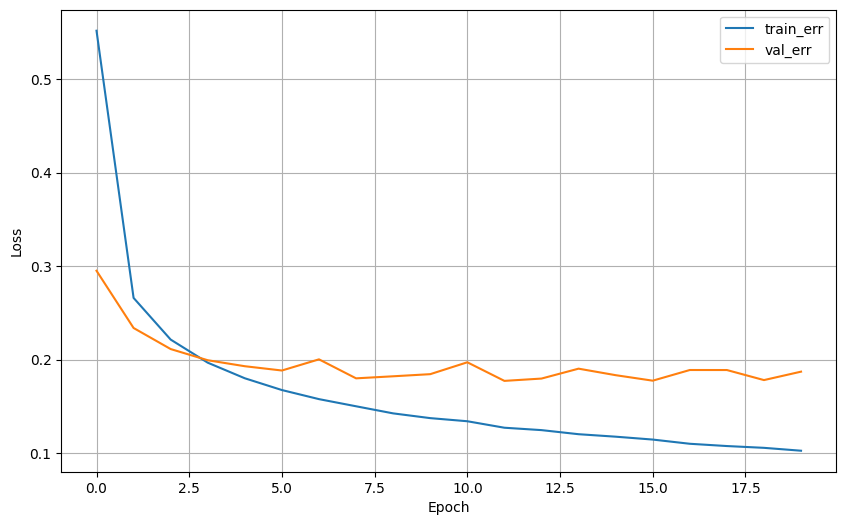

In [38]:
dl_history_plot(history)

In [39]:
pred = model2.predict(x_test)
pred_2 = pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [40]:
print(confusion_matrix(y_val, pred_2))
print(classification_report(y_val, pred_2))

[[ 954    0    2    2    1    9    6    2    2    2]
 [   0 1102    3    7    0    2    4    1   16    0]
 [   7    1  965   28    3    0    6   13    9    0]
 [   0    1    5  978    0    5    2    4   10    5]
 [   4    1    4    0  918    0   11    5    4   35]
 [   4    1    0   21    0  832   14    2    8   10]
 [  13    2    1    1    2   25  906    0    7    1]
 [   1    3   16   11    0    3    0  970    3   21]
 [   7    1    5   28    4   18    5    4  895    7]
 [   6    3    1    7   14    8    2    7    8  953]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.90      0.97      0.93      1010
           4       0.97      0.93      0.95       982
           5       0.92      0.93      0.93       892
           6       0.95      0.95      0.95       958
           7       0.96      0.94   